<table class="table table-bordered">
    <tr>
        <th style="text-align:center;"><h1>INDONESIAN TRAVELLER SURVEY</h1><h2>By: Pranav Vijitharan</h2><h3>
    </tr>
</table>

In [3]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output

px.set_mapbox_access_token("pk.eyJ1IjoibmVsc29ubGpoIiwiYSI6ImNrY24zZHFvazA3YzYyeHM2Y2xnd3Y3czcifQ.srrEGm4hZu6wYcQzDb6N6g")

%matplotlib inline

df = pd.read_excel('mock indonesian traveller survey data.xlsx',sheet_name = '2014_2015Data')

# Renamed some columns to make it easeier to read and understand
df.rename(columns = {'f1_gender':'Gender',
                     'R.mth':'month'}, inplace = True)

df_bkup = df.copy()

## Content
#### 1. [Introduction](#part1)
    
   - [1.1 Merlion Tour Background](#part1.1)
   - [1.2 Exploratory Questions](#part1.2)
   
#### 2. [Data Preparation](#part2)
    
   - [2.1 State of the Data](#part2.1)
   - [2.2 Removing/Replacing Values](#part2.2)
   - [2.3 Removing/Adding Columns](#part2.3)
   
#### 3. [Data Analysis & Visualisations](#part3)
   - [3.1 Visual 1](#part3.1)
   - [3.2 Visual 2](#part3.2)
   - [3.3 Visual 3](#part3.3)
   - [3.4 Visual 4](#part3.4)
   - [3.5 Visual 5](#part3.5)
   - [3.6 Visual 6](#part3.6)
   - [3.7 Visual 7](#part3.7)
   - [3.8 Visual 8](#part3.8)
   - [3.9 Visual 9](#part3.9)
   - [3.10 Visual 10](#part3.10)
   - [3.11 Visual 11](#part3.11)

#### 4. [Dashboard](#part4)
   - [4.1 Dashboard 1 (Traveller Demographic)](#part4.1)
   - [4.2 Dashboard 2 (Strategies to Improve Sales)](#part4.2)

#### 5. [Reflection](#part5)

# 1. Introduction <a id="part1"></a>

I am Pranav Vijitharan, and I am the leader of the tourism research team for Merlion Tour. Our team has collected data on Indonesian tourists visits in Singapore which consists of 2014 and 2015 data in it. Using this data we intend to find out the Indonesian Travellers' Demographic and find strategies to attract more Indonesian Travellers to buying our packages which will ultimately increase our sales. Based on the findings that I got from the data, I plotted several visualisations and dashboards using Python. The libraries that I used were Pandas, Plotly and Dash. Pandas helps me with the data cleaning process, Plotly helped me to create interactive visuals and lastly Dash helped me to create an interactive dashboard.

## 1.1 Merlion Tour Background <a id="part1.1"></a>

Merlion Tours is a leading tour agency company in Singapore that offers an exciting range of travel experiences to its customers. With a commitment to providing exceptional service, Merlion Tours aims to provide a seamless and enjoyable travel experience to its customers. As of now, Merlion Tours has branches in Malaysia, Indonesia, Thailand, India and Philippines. Most of the travellers that come to Merlion Tours are from Indonesia. Since Indonesians buy the highest number of Merlion Tours Packages, our company CEO, Mr Kenneth Ong has tasked me with the assignment to create visuals to analyse specifically Indonesian travellers patterns and also find strategies that will boost the company's revenue.

## 1.2 Exploratory Questions <a id="part1.2"></a>

Before making the visualizations, I have to ask myself exploratory questions to identify opportunities, reveal underlying trends and patterns, and understand user context and all of this will lead to better visualisations.

Exploratory Questions: 
1. Which time of the year does Indonesians prefer to travel?
2. Which cities does most of the Indonesian Travellers come from?
3. Does the city that the traveller live in affect the transporation method?
4. What are the popular reasons for Indonesians to travel to Singapore?
5. What is the most optimal length for Merlion packages?
6. How much are Indonesians willing to spend on their accomodation (Hotels) in Singapore?
7. What are the most popular star ratings of hotel that Indonesian prefer to go to?
8. What are the most popular hotels that Indonesians go to in Singapore?
9. How many companions does usually Indonesians go along with when travelling to Singapore?
10. Do Merlion Tours need Tour Guides who can speak different languages
11. What are the percentage of travellers who booked a package and travelled to Singapore?
12. How many travellers are visiting Singapore for the 1st time?

# 2. Data Preparation <a id="part2"></a>

## 2.1 State of the Data <a id="part2.1"></a>

The data is not at its best form as it is quite dirty. The data has many missing values and some values do not make sense at times. Some of the values are also very wordy and has unnecessary words in it for e.g. in the Purpose_grp column, the values had '+Accompanying Pax' at the end. Also, the values had some spelling mistakes too e.g. Managers was spelled as Mager. Additionally, some columns like the Designation and Designation.oth columns had too many errors in it and it was too specic/granular which made these columns unusable. Since this data is from a survey, some of the responses might be wrong or fake too, which might lead me to creating incorrect findings and trends.

In [4]:
# Too much null values
print(df.isnull().sum().sort_values(ascending = False).to_string())

travel_companion.5    8870
travel_companion.4    8793
Land_Terminal         8532
travel_companion.3    8397
travel_companion.2    7255
Sea_Terminal          6059
MainHotel             4590
Air_Terminal          3190
f5_designation        3096
f5_designation.oth    2969
f4_industry           2844
MainAccomm              33
langint                  0
1st_visit                0
month                    0
date                     0
Country_residence        0
travel_companion.1       0
City_residence           0
totshopping_$            0
tototh_$                 0
totmedi_$                0
totedu_$                 0
totbiz_$                 0
tottran_$                0
totfnb_$                 0
totacc_$                 0
Purpose_grp              0
Purpose                  0
Year                     0
f3_occupation            0
Gender                   0
travel_type              0
length_stay              0
case                     0


In [5]:
# this data is too granular
print(df['f5_designation.oth'].nunique())

421


## 2.2 Removing/Replacing Values <a id="part2.2"></a>

I replaced some values in the dataframe due to several reasons. One reason is because of the spelling errors like I mentioned earlier. And another reason is because some values were too wordy. Replacing these values is imortant as consistent spelling in the data is important for ensuring that the data is easy to understand and use. Correcting spelling mistakes in the data can help to ensure that the data is consistent and standardized. Reducing the length of values also makes the data more readable.

I also replaced the null values to 'NIL' instead.

There were also some errors in the data that either had to be replaced or removed. Firstly, I noticed that there was a hotel named 908.0. However after researching, I realised that there is no hotel called 908.0. So, I replaced it to 'NIL'. There were also some error in the City_residence column. Based on some research I realised that Jogjakarta and Yogyakarta are both the same city in Indonesia but that city has 2 different names. So I renamed Jogjakarta to Yogyakarta. Also there were 2 values in the City_residence column 'Mataram / Lombok Is.' and 'Lombok'. Since Lombok already exists in the column, I renamed the 'Mataram / Lombok Is.' value to only 'Mataram'.

In [6]:
# replace Nan values with 'NIL'
df['Air_Terminal'].fillna('NIL',inplace=True)
df['Sea_Terminal'].fillna('NIL',inplace=True)
df['Land_Terminal'].fillna('NIL',inplace=True)
df['travel_companion.2'].fillna('NIL',inplace=True)
df['travel_companion.3'].fillna('NIL',inplace=True)
df['travel_companion.4'].fillna('NIL',inplace=True)
df['travel_companion.5'].fillna('NIL',inplace=True)
df['MainAccomm'].fillna('NIL',inplace=True)
df['MainHotel'].fillna('NIL',inplace=True)

In [7]:
# replace month values to MMM format to make it shorter
replacement_map = {'month':{'January':'Jan',
                            'February':'Feb',
                            'March':'Mar',
                            'April':'Apr',
                            'June':'Jun',
                            'July':'Jul',
                            'August':'Aug',
                            'September':'Sep',
                            'October':'Oct',
                            'November':'Nov',
                            'December':'Dec'}}

df.replace(replacement_map, inplace=True)

In [8]:
# replace wordy values to conscise format
replacement_map = {'Purpose_grp':{'Healthcare+Accompanying Pax':'Healthcare',
                                  'Business+Accompanying Pax':'Business',
                                  'Education+Accompanying Pax':'Education',
                                  'Others/ Refused':'Others'},
                   
                   'Purpose':{'Holiday/ Rest & Relax':'Relaxation',
                              'Others - Personal (e.g. weddings, funerals, etc)':'Others - Personal',
                              'To take or join a regional or international cruise':'Cruise',
                              'Visiting an international student studying in Singapore':'Visit international student',
                              'Accompanying a Healthcare/medical visitor for Outpatient consultation/treat':'Accompany visitor for Outpatient consultation',
                              'Sightseeing/ Attractions':'Sightseeing',
                              'IR (e.g. MBS, RWS)':'Integrated Resorts',
                              'Others - Work Related (e.g. visa, insurance, etc)':'Others - Work Related',
                              'To shop/attend shopping events in Singapore':'Shopping events',
                              'Executive training, including training workshops and seminar':'Executive training',
                              'Corporate/business meetings':'Business meetings',
                              'Skills development/skills training/vocational training':'Skills development',
                              'Gathering informations on the Education services in Singapor':'Gathering info on Education',
                              'Accompanying a Healthcare/medical visitor for Day surgery':'Accompanying visitor for Day surgery',
                              'Accompanying a Healthcare/medical visitor for In-patient treatment':'Accompanying visitor for In-patient treatment',
                              'Accompaning an international student studying in Singapore':'Accompany international student'}
                  }

df.replace(replacement_map, inplace=True)

In [9]:
# replace wordy values to conscise format
replacement_map = {'MainAccomm':{'Hostel (Rental by bed)':'Hostel',
                                'Other non-paid accommodations (e.g. religious places, camp,':'Other non-paid accommodations',
                                'Other paid accommodations (e.g.chalets, country clubs, etc)':'Other paid accommodations',
                                'Accommodation not required - Day Tripper':'Accommodation not required',
                                'Accommodation not required - On-board Cruise':'Accommodation not required'
                               }
                  }

df.replace(replacement_map, inplace=True)

In [10]:
# There was a hotel named 908.0. However after researching, there is no hotel called 908.0.
for i in range(len(df['MainHotel'])):
    if type(df.loc[i]['MainHotel']) == int:
        df.loc[i,'MainHotel'] = 'NIL'

In [11]:
# Replaced Mataram / Lombok Is. to Mataram only as Lombok already exists in the data

# Jogjakarta and Yogyakarta are both the same city in Indonesia but that city has 2 different names based on my research.
# So I will be renaming Jogjakarta to Yogyakarta

replacement_map = {'City_residence':{'Mataram / Lombok Is.':'Mataram',
                                     'Jogjakarta':'Yogyakarta'
                                    }
                  }

df.replace(replacement_map, inplace=True)

## 2.3 Removing/Adding Columns <a id="part2.3"></a>

I added month_number, day and quarter columns. This will allow me to visualise data related to time better. 

In [12]:
df['month_number'] = df['month'].map({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})

df['quarter'] = df['month_number'].map({1:'Q1', 2:'Q1', 3:'Q1', 4:'Q2', 5:'Q2', 6:'Q2', 7:'Q3', 8:'Q3', 9:'Q3', 10:'Q4', 11:'Q4', 12:'Q4'})

df['day'] = df['date'].apply(lambda r:r.day)

I created a column called Travel_Method to understand which mode of transportation does Indonesians prefer to use.

In [13]:
# Joining the 3 terminal columns together
df['Terminal'] = pd.concat([df['Air_Terminal'], df['Sea_Terminal'], df['Land_Terminal']], axis=1).apply(lambda x: x[0] if x[0] != 'NIL' else x[1] if x[1] != 'NIL' else x[2] if x[2] != 'NIL' else 'NIL', axis=1)

# Assigning Air/Sea/Land based on Terminal
df['Travel_Method'] = df['Terminal'].map({'Terminal 1':'Air','Terminal 2':'Air','Terminal 3':'Air','HCC':'Sea','MBCCS':'Sea','TMFT':'Sea','Tuas':'Land','Woodlands':'Land','NIL':'NIL'}).fillna('NIL')

I created a column to find the total number of companions that followed the traveller. 

In [14]:
no_of_companion_list = []

for i in range(len(df)):
    count = 0
    if df.loc[i,'travel_companion.1'] != 'Alone':
        count += 1
    if df.loc[i,'travel_companion.2'] != 'NIL':
        count += 1
    if df.loc[i,'travel_companion.3'] != 'NIL':
        count += 1
    if df.loc[i,'travel_companion.4'] != 'NIL':
        count += 1
    if df.loc[i,'travel_companion.5'] != 'NIL':
        count += 1
    no_of_companion_list.append(count)

df['No._of_Companion'] = no_of_companion_list

In order for me to see which star rating hotel does Indonesians prefer, I had to gather the star ratings of each hotel in Singapore and add it in the DataFrame.

In [15]:
# Adding the star rating for each hotel
df['StarRatingHotel'] = df['MainHotel'].map({'V Hotel Lavender': '4.0', 'Madras Hotel': '2.0', 'Hotel 81 - Geylang': '2.0', 'Hotel 81 - Bencoolen': '2.0', 'Hotel Clover (Not Specified)': '4.0', 'Bay Hotel Singapore': '4.0', 'Fragrance Hotel - Classic': '2.0', 'Hotel 81 - Balestier': '2.0', 'Ibis Singapore on Bencoolen': '3.0', 'Hotel Michael': '5.0', 'Orchid Hotel': '4.0', 'Holiday Inn Singapore Orchard City Centre': '4.0', 'Fragrance Hotel - Selegie': '3.0', 'Fragrance Hotel - Bugis': '2.0', 'Mandarin Orchard Singapore': '4.0', 'River View Hotel': '4.0', 'Concorde Hotel Singapore': '4.0', 'Amara Singapore': '4.0', 'Ramada Singapore at Zhongshan Park': '4.0', 'Festive Hotel': '5.0', 'Hotel 81 - Bugis': '2.0', 'Grand Hyatt Singapore': '5.0', 'Fragrance Hotel - Crystal': '2.0', 'York Hotel': '4.0', 'Moon 23 Hotel': '2.0', 'Marina Bay Sands Singapore': '5.0', 'Fragrance Hotel - Riverside': '3.0', 'Hotel Jen Tanglin Singapore': '4.0', 'Royal Plaza': '5.0', 'New Cape Inn': '2.0', 'Village Hotel Bugis': '4.0', 'Equarius Hotel': '5.0', 'Strand Hotel': '3.0', 'V Hotel (Not Specified)': '4.0', 'Dorsett Singapore': '4.0', 'Hotel 81 - Princess': '2.0', 'Hotel Royal @ Queens': '4.0', 'Swissotel The Stamford, Singapore': '5.0', 'Village Hotel Changi': '4.0', 'Oxley Hotel 88': '2.0', 'Victoria Hotel': '2.0', 'Hotel Bencoolen': '3.0', 'Orchard Hotel Singapore': '4.0', 'Hotel Jen Orchardgateway Singapore': '4.0', 'Siloso Beach Resort': '4.0', 'Peninsula.Excelsior Hotel': '4.0', 'The Elizabeth': '4.0', 'RELC International Hotel': '3.0', 'Beach Hotel': '3.0', 'Crowne Plaza Changi Airport': '4.0', 'Sheraton Towers Singapore Hotel': '5.0', 'V Hotel Bencoolen': '4.0', 'Fragrance Hotel - Imperial': '3.0', 'Grand Park City Hall': '5.0', 'Broadway Hotel': '2.0', 'Fragrance Hotel - Pearl': '2.0', 'Fragrance Hotel - Sapphire': '2.0', 'Swissotel (Not Specified)': '5.0', 'Grand Copthorne Waterfront Hotel Singapore': '5.0', 'Marrison Hotel': '2.0', 'Santa Grand Hotel Chinatown': '5.0', 'Bunc@Radius Hostel on Clarke Quay': '2.0', 'Fragrance Hotel (Not Specified)': '2.0', 'Hotel 81 - Selegie': '2.0', 'The Regent Singapore': '5.0', 'Hotel Royal': '4.0', 'Porcelain Hotel': '3.0', 'Parc Sovereign Hotel': '4.0', 'Chang Ziang Hotel': '2.0', 'South East Asia Hotel': '3.0', 'Fragrance Hotel - Lavender': '2.0', 'Fragrance Hotel - Ruby': '2.0', 'Hotel Supreme': '3.0', 'Fragrance Hotel - Emerald': '2.0', 'Orchard Parade Hotel': '4.0', 'Hotel Fort Canning': '5.0', 'Hotel 81 - Classic': '2.0', 'Le Hotel': '3.0', 'Big Hotel': '4.0', 'Hotel 101': '2.0', 'Amaris by Santika': '2.0', 'Hotel 81 - Chinatown': '2.0', 'Value Hotel - Thomson': '3.0', 'Arianna Hotel': '2.0', 'Ibis Singapore Novena': '3.0', 'Hotel 81 - Hollywood': '2.0', 'The Fullerton Hotel': '5.0', 'Summer View Hotel': '3.0', 'The Keong Saik Hotel': '3.0', 'Holiday Inn Express Singapore Orchard Road': '3.0', 'Hotel Nuve': '4.0', 'Park Avenue Rochester': '4.0', '5footway.Project Boat Quay': '2.0', 'Parkroyal on Kitchener Road': '4.0', 'Grand Mercure Roxy Hotel': '4.0', 'Parkroyal on Pickering': '5.0', 'Carlton Hotel': '4.0', 'Classique Hotel': '3.0', 'Bright Star Hotel': '2.0', 'Tai Hoe Hotel': '2.0', 'Days Hotel Singapore at Zhongshan Park': '3.0', 'Penta Hotel': '3.0', 'Amrise Hotel': '2.0', 'Value Hotel - Balestier': '2.0', 'Singapore Marriott Hotel': '5.0', 'Hotel 81 - Tristar': '2.0', '5footway.inn Project Chinatown 2': '2.0', 'Hotel 81 - Dickson': '2.0', 'Furama City Centre Singapore': '4.0', 'The Fragrance Hotel': '2.0', 'Quality Hotel Marlow': '4.0', 'Hotel 81 - Heritage': '2.0', 'Hotel 81 - Rochor': '2.0', 'Novotel Singapore Clarke Quay': '4.0', 'Hard Rock Hotel': '5.0', 'The Fullerton Bay Hotel': '5.0', 'Park View Hotel': '3.0', 'Furama Riverfront Singapore': '4.0', 'Hotel Grand Pacific': '4.0', 'Fragrance Hotel - Royal': '2.0', 'Parkroyal on Beach Road, Singapore': '4.0', 'The Quincy Hotel': '4.0', 'Movenpick Heritage Hotel Sentosa': '5.0', 'Santa Grand Hotel Bugis': '3.0', 'Rendezvous Grand Hotel Singapore': '4.0', 'Santa Grand Hotel Little India': '3.0', 'Soluxe Inn': '3.0', 'Hotel 81 (Not Specified)': '3.0', 'Hotel Miramar Singapore': '4.0', 'Conrad Centennial Singapore': '5.0', 'Swissotel Merchant Court,Singapore': '4.0', 'Link Hotel': '4.0', 'Grand Park Orchard': '5.0', 'Chinatown Hotel': '3.0', 'Lulu Hotel': '4.0', "Copthorne King's Hotel Singapore": '4.0', "Shangri-La's Rasa Sentosa Resort & Spa, Singapore": '5.0', '85 Beach Garden Hotel': '2.0', 'Fragrance Hotel - Balestier': '2.0', 'Fairmont Singapore': '5.0', 'Bayview Hotel Singapore': '3.0', 'Oxford Hotel': '3.0', 'Amoy Hotel': '4.0', 'The Claremont': '4.0', 'Champion Hotel': '3.0', 'Naumi': '5.0', 'Cultural Hotel': '3.0', 'Ibis Singapore (Not Specified)': '3.0', 'Carlton City Hotel Singapore': '4.0', 'Village Hotel (Not Specified)': '4.0', 'Hotel 81 - Lavender': '2.0', 'Holiday Inn Singapore (Not Specified)': '4.0', 'Innotel Hotel': '3.0', 'The Ritz-Carlton, Millenia Singapore': '5.0', 'The Pan Pacific Hotel Singapore': '5.0', 'Shangri-La Hotel': '5.0', 'Park Avenue Changi': '4.0', 'Lai Ming Hotel Cosmoland': '1.0', 'New Orchid Hotel': '2.0', 'The Seacare Hotel': '4.0', 'Hotel 81 - Orchid': '2.0', 'Aqueen Hotel - Lavender': '3.0', 'Le Peranakan Hotel': '2.0', 'Aliwal Park Hotel': '2.0', 'Kam Leng Hotel': '3.0', 'Village Hotel Katong': '4.0', 'Hotel 81 - Changi': '3.0', 'Hotel 81 - Osaka': '2.0', 'Hilton Singapore': '5.0', 'Holiday Inn Singapore Atrium': '4.0', 'The Westin Singapore': '5.0', "Lloyd's Inn": '3.0', 'Dragon Court Hotel': '3.0', 'Marrison @ Desker': '2.0', 'InterContinental Singapore': '5.0', 'Park Regis Singapore': '4.0', 'Hotel Hamilton': '3.0', 'Fragrance Hotel - Sunflower': '2.0', 'Fortuna Hotel': '3.0', 'Park 22 Hotel': '2.0', 'Oasia Hotel': '4.5', 'Hotel 81 - Cosy': '2.0', 'St. Regis Hotel Singapore': '5.0', 'Goodwood Park Hotel': '5.0', '5footway.inn Project Bugis': '2.0', 'Marina Mandarin': '5.0', 'Arton Hotel': '3.0', 'Raffles Hotel Singapore': '5.0', 'Hotel 34': '4.0', "Hotel Re! @ Pearl's Hill": '4.0', 'Hotel Grand Chancellor': '3.0', 'Harbour Ville Hotel': '3.0', 'Parkroyal (Not Specified)': '4.0', 'Bliss Hotel Singapore': '3.0', 'Yes Chinatown Pt. Hotel': '1.0', 'Park Hotel Clarke Quay': '4.0', 'Holiday Inn Express Singapore Clarke Quay': '3.0', 'M Hotel Singapore': '4.0', 'Village Hotel Albert Court': '4.0', 'Robertson Quay Hotel': '3.0', 'Amara Sanctuary Resort, Sentosa': '5.0', 'Mandarin Oriental, Singapore': '5.0', 'Four Chain View Hotel': '2.0', 'Changi Cove': '4.0', 'Sandpiper Hotel': '3.0', 'Haising Hotel': '1.0', 'One Farrer Hotel & Spa': '5.0', 'Furama Singapore (Not Specified)': '4.0', 'Fragrance Hotel - Oasis': '2.0', 'Lex Hotel': '1.0', 'Venue Hotel': '3.0', 'Hotel 81 - Lucky': '2.0', 'Santa Grand (Not Specified)': '3.0', 'Four Seasons Hotel': '5.0', 'Hotel Clover 33 Jalan Sultan': '4.0', 'Pan Pacific Orchard': '5.0', 'The Southbridge Hotel': '3.0', 'J8 Hotel': '3.0', 'Capella Hotel, Singapore': '5.0', 'Super 8 Hotel': '2.0', 'Hotel Kai': '3.0', 'Asia Star Hotel': '1.0', 'Studio M Hotel': '4.0', 'Golden Royal Hotel': '2.0', 'W Singapore Sentosa Cove Hotel': '5.0', 'Royal India Hotel': '1.0', 'Hotel 81 - Violet': '2.0', 'Pasir Panjang Inn': '2.0', 'Jade Hotel': '1.0', '5footway.inn Project (Not Specified)': '2.0', 'VIP Hotel': '3.0', 'Hotel 81 - Palace': '2.0', 'Hotel 81 - Sakura': '2.0', 'Santa Grand Hotel West Coast': '3.0', 'Value Hotel (Not specified)': '3.0', 'Wanderlust Hotel': '4.0', 'The Ardennes Hotel': '3.0', 'Balestier Hotel': '2.0', 'Fragrance Hotel - Waterfront': '2.0', 'Hotel 1929': '3.0', 'Naumi Liora': '5.0', 'Hotel 81 - Cherry': '2.0', 'The Scarlet Hotel': '4.0', 'The Inn At Temple Street': '3.0', '5footway.inn Project Chinatown 3': '2.0', 'Sofitel So Singapore': '5.0', 'Grand C Hotel': '2.0', 'Gay World Hotel': '1.0', 'Traders Hotel Singapore': '4.0', 'Orchard Grand Court Hotel': '3.0', 'YMCA Singapore': '3.0', 'The Sultan': '4.0', 'Nostalgia Hotel': '4.0', 'Value Hotel': '2.0', 'Klapsons The Boutique Hotel': '4.0', 'Taipei Hotel (2000)': '2.0', 'Hotel 81 - Gold': '2.0', 'Airport Transit Hotel': '4.0', 'The Gallery Hotel': '4.0', 'Mayo Inn': '3.0', 'Hotel Meridien Changi': '4.0', 'Fragrance Hotel - Rose': '2.0', 'Malacca Hotel': '4.0', 'Madras Hotel Eminence': '3.0', 'The Sentosa Resort & Spa': '5.0', 'Fragrance Hotel - Ocean View': '2.0', 'Asphodel Inn': '2.0', 'New Park Hotel': '4.0', 'Amber Hotel': '4.0', 'Somerset Liang Court': '3.5', 'Grand Hotel': '4.0', 'The Westin Stamford & Westin Plaza': '5.0', 'Perak Hotel': '2.0', 'Grand U Hotel': '1.5', 'Wangz Hotel': '4.0', 'Starlet Hotel': '4.0', 'Hotel 81 - Joo Chiat': '2.0', 'Santa Grand Hotel East Coast': '3.0', 'Aqueen Hotel - Balestier': '3.0', 'La Mode (Sophia)': '1.0', 'Capri By Fraser Changi City, Singapore': '4.0', 'Hotel Jen Singapore': '4.0', 'New Gateway Hotel': '4.0', 'Hotel Clover': '4.0', 'New Cathay Hotel (Geylang)': '2.0', 'Kerbau Hotel': '2.5'}).fillna('NIL')

Since the expenditure of the traveller is splitted into different columns, I wanted to get the data for the total expenditure and created a new column.

In [16]:
expense_df = df.filter(regex = '^tot',axis = 1)
expense_list = []

for i in range(len(expense_df)):
    expense = 0
    for j in range(len(expense_df.columns)):
        expense += expense_df.iloc[i,j]
    expense_list.append(expense)
    
df['totexpenses_$'] = expense_list

I removed many columns as I do not think I will be able to gather good insights and findings from it. 
The columns that I removed:
1. Country_residence (all the values are 'Indonesia')
2. Air_Terminal, Sea_Terminal, Land_Terminal (I merged these 3 columns into 1)
3. f5_designation, f5_designation.oth, f4_industry, f3_occupation (these data are not important as they are not able to going to help in my visuals)
4. All the travel_companion (I already calculated the total number of companions per traveller)

                     

In [17]:
df = df.drop(columns=["Country_residence","Air_Terminal", "Sea_Terminal", "Land_Terminal","f5_designation", "f5_designation.oth", "f4_industry", "f3_occupation","travel_companion.1","travel_companion.2","travel_companion.3","travel_companion.4","travel_companion.5"])

#### Final Output Data

In [18]:
df

,case,Year,month,date,City_residence,Purpose_grp,Purpose,langint,1st_visit,length_stay,...,MainAccomm,MainHotel,month_number,quarter,day,Terminal,Travel_Method,No._of_Companion,StarRatingHotel,totexpenses_$
0,18,2015,Jan,2015-01-01,Yogyakarta,Leisure,Relaxation,English,No,4 days,...,Hotel,V Hotel Lavender,1,Q1,1,Terminal 1,Air,2,4.0,1096.186995
1,41,2015,Jan,2015-01-01,Batam,Leisure,Relaxation,English,No,2 days,...,Hotel,Madras Hotel,1,Q1,1,HCC,Sea,3,2.0,379.309926
2,43,2015,Jan,2015-01-01,Batam,Leisure,Relaxation,English,No,3 days,...,Hotel,Hotel 81 - Geylang,1,Q1,1,HCC,Sea,2,2.0,420.727677
3,44,2015,Jan,2015-01-01,Batam,Leisure,Others,English,No,1 day,...,Accommodation not required - Others,NIL,1,Q1,1,HCC,Sea,3,NIL,378.990074
4,45,2015,Jan,2015-01-01,Batam,Others,Others - Personal,English,No,1 day,...,Hotel,Hotel 81 - Bencoolen,1,Q1,1,HCC,Sea,2,2.0,342.356298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8882,23239,2014,Dec,2014-12-28,Batam,Leisure,Shopping events,English,No,Under 1 day,...,Accommodation not required,NIL,12,Q4,28,HCC,Sea,1,NIL,152.884995
8883,23240,2014,Dec,2014-12-28,Surabaya,Business,General business purpose,English,No,Under 1 day,...,Accommodation not required,NIL,12,Q4,28,HCC,Sea,2,NIL,100.863932
8884,23241,2014,Dec,2014-12-28,Batam,Others,Others - Personal,English,No,Under 1 day,...,Accommodation not required,NIL,12,Q4,28,HCC,Sea,3,NIL,794.744736
8885,23242,2014,Dec,2014-12-28,Surabaya,Leisure,Relaxation,English,Yes,2 days,...,Hotel,Fragrance Hotel - Ruby,12,Q4,28,HCC,Sea,1,2.0,1157.292504


# 3. Data Analysis & Visualisations <a id="part3"></a>

## 3.1 Visual 1 <a id="part3.1"></a>

In [19]:
year_2014 = df[df['Year']==2014]
month_count_2014 = year_2014.groupby('month_number')['case'].count()
year_2015 = df[df['Year']==2015]
month_count_2015 = year_2015.groupby('month_number')['case'].count()
month_number = month_count_2014.index

fig1 = go.Figure()

fig1.add_trace(go.Scatter(x=month_number, y=month_count_2014, name='2014', line=dict(width= 4,color='#e03c74'), marker=dict(size=10)))
fig1.add_trace(go.Scatter(x=month_number, y=month_count_2015, name='2015', line=dict(width= 4,color='#ffbc84'), marker=dict(size=10)))

fig1.update_traces(mode="markers+lines", hovertemplate=None)

fig1.update_layout(title_text='No. of Travellers Visiting SG by Month',
                  title_x=0.5,title_y=0.97,
                  title_font=dict(size=20,family='Roboto',color='#FFFFFF'),
                  legend_font=dict(size=20,family='Roboto',color='#FFFFFF'),
                  xaxis_ticktext=df['month'].unique().tolist(), 
                  xaxis_tickvals=month_number,
                  width=800,
                  height=300,
                  margin=dict(l=100, r=100, t=40, b=10),
                  hovermode="x",
                  template='plotly_dark')

fig1.update_xaxes(title_text='Month',titlefont=dict(size=15,family='Roboto',color='#FFFFFF'))
fig1.update_yaxes(title_text='No. of Travellers',titlefont=dict(size=15,family='Roboto',color='#FFFFFF'))

fig1.show()

This visual shows a multi line chart which highlights the no. of Indonesian travellers entering Singapore each month. This visual highlight the exploratory question, "Which time of the year does Indonesians prefer to travel?" Based on this visual for the months January, February, March, April, July, and August, both 2014 and 2015 had relatively the same number of travellers. However, June, October, November and December had a huge difference. Also, for 2014, the months March and June had the most number of travellers while for 2015, the months October and December had the most number of travellers. 

Based on some research, I found out that during June 2015, Indonesia faced a major haze situation in the Riau region. Due to haze, the visiblilty got too low causing flights to be disrupted. This can explain why there has a huge difference between June 2014 and June 2015. 

Source: https://www.straitstimes.com/asia/se-asia/indonesias-riau-hit-by-worst-haze-in-2015-flights-disrupted

## 3.2 Visual 2 <a id="part3.2"></a>

In [20]:
from itertools import islice

no_of_travellers = []

# Create the data list for the heatmap to show number of travellers in each day
data = df[['date','case']]
data = data.groupby(['date'])['case'].count()
data = data.to_frame()
# Add 0 to days that are not present in data given
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max())
data = data.reindex(date_range,fill_value=0)
data = data.fillna(value={'case':0})
data = data['case'].tolist()
# Split the data by months
length_to_split = [31,28,31,30,31,30,31,31,30,31,30,31,31,28,31,30,31,30,31,31,30,31,30,31]
data = iter(data)
data = [list(islice(data, sub)) for sub in length_to_split]
# Split the data by year and add it to no_of_travellers list
no_of_travellers.append(data[0:12])
no_of_travellers.append(data[12:])
days = "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"

fig2 = go.Figure()
fig2.add_trace(go.Heatmap(z=no_of_travellers[0], y=df['month'].unique(), x=days, name='2014',colorscale='sunsetdark',showscale=False, hovertemplate ='<b>No. of Travellers: %{z}</b>'+'<br>Date: %{x}' + '-' + '%{y}<extra></extra>'))
fig2.add_trace(go.Heatmap(z=no_of_travellers[1], y=df['month'].unique(), x=days,visible=False, name='2015',colorscale = 'sunsetdark',showscale=False, hovertemplate ='<b>No. of Travellers: %{z}</b>'+'<br>Date: %{x}' + '-' + '%{y}<extra></extra>'))

fig2.update_layout(
    updatemenus=[dict(type="buttons",showactive=True,bgcolor='white',font={'size': 15,'family': 'Roboto','color':'#000000'},
                 buttons=[dict(label="2014",method="update",args=[{"visible": [True, False]},{"title": "No. of Travellers Visiting SG by Day (2014)"}]),
                          dict(label="2015",method="update",args=[{"visible": [False, True]},{"title": "No. of Travellers Visiting SG by Day (2015)"}])])],
    
    title={'text': "No. of Travellers Visiting SG by Day (2014)",
           'font': {'size': 20,'family': 'Roboto','color':'#FFFFFF'},
           'x': 0.5,
           'y':0.97,
           'xanchor': 'center'},
    paper_bgcolor='#141414',
    xaxis=dict(color='white'),
    yaxis=dict(color='white'),
    margin=dict(l=40, r=40, t=40, b=10),
    width=800,
    height=300)

fig2.show()

This visual shows a Heatmap which highlights the days that had the most number of Indonesian Travellers. This visual highlight the exploratory question, "Which time of the year does Indonesians prefer to travel?" Based on the heatmap, in 1st of May 2014 and 31st of July 2015, there were many travellers who came to Singapore. 

When I was researching, I realised that 1st May was labour day in Indonesia and it was a public holiday.

## 3.3 Visual 3 <a id="part3.3"></a>

In [21]:
quarter_count_2014 = year_2014.groupby('quarter')['case'].count()
quarter_count_2015 = year_2015.groupby('quarter')['case'].count()
quarter = quarter_count_2014.index

fig3 = go.Figure()
fig3.add_trace(go.Pie(labels=quarter, values=quarter_count_2014, textinfo='percent', textfont=dict(size=18,color='#FFFFFF'), hole=0.6, name='2014', sort=False, hovertemplate ='<b>%{label}</b>'+'<br>No. of Travellers: %{value}<br>' + 'Percent: %{percent}<extra></extra>', marker=dict(colors=['#801c6c',"#e03070",'#f88c74','#ffbc84'])))
fig3.add_trace(go.Pie(labels=quarter, values=quarter_count_2015, textinfo='percent', textfont=dict(size=18,color='#FFFFFF'), hole=0.6, name='2015', sort=False, hovertemplate ='<b>%{label}</b>'+'<br>No. of Travellers: %{value}<br>' + 'Percent: %{percent}<extra></extra>', visible=False,marker=dict(colors=['#801c6c',"#e03070",'#f88c74','#ffbc84'])))

fig3.update_layout(
    updatemenus=[dict(type='buttons',showactive=True,x=0.5,y=0.5,xanchor="center",yanchor="middle",bgcolor='white',font={'size': 15,'family': 'Roboto','color':'#000000'},
                 buttons=[dict(label='2014',method='update',args=[{'visible': [True, False]},{'title': 'No. of Travellers Visiting SG by Quarter (2014)','showlegend': True}]),
                          dict(label='2015',method='update',args=[{'visible': [False, True]},{'title': 'No. of Travellers Visiting SG by Quarter (2015)','showlegend': True}])])],
    
     title={'text': "No. of Travellers Visiting SG by Quarter (2014)",
           'font': {'size': 20,'family': 'Roboto','color':'#FFFFFF'},
           'x': 0.5,
           'y':0.97,
           'xanchor': 'center'},
     
     hoverlabel=dict(font_size=14,font_family='Roboto'),
     legend_font=dict(size=12,family='Roboto',color='#FFFFFF'),
     legend=dict(title=dict(text='Quarters'),x=0.85,y=0.5),
     paper_bgcolor='#141414',
     margin=dict(l=40, r=40, t=40, b=10),
     width=800,
     height=300)     

fig3.show()

This visual shows a Donut chart which highlights the quarters that had the most number of Indonesian Travellers. This visual highlight the exploratory question, "Which time of the year does Indonesians prefer to travel?" Based on the chart, in 2014, the Q2 had the most number of travellers while in 2015, Q4 had the most number of travellers. Moreover, the differences between the other Quarters were not huge and all of them were consistent.

## 3.4 Visual 4 <a id="part3.4"></a>

In [22]:
# Retrieved the latitude and longitude of every city in City_residence column
latitudes = [4.6927782, -8.4095178, -1.2415007, -6.914744, -3.3288505, -6.2422292, 1.0746384, -6.2372654, -3.7965587, 
             1.1554145, -6.5897295, -6.7380388, -8.6500122, 1.6740355, -7.6678980, -0.7893000, -6.1744650, -1.6038245, 
             -6.8098100, -7.810000, -6.8166700, -2.5000000, 1.06350, -10.1746569, -5.3696171, -0.14969, -8.4076478, 
             -7.4756295, -5.1474686, -7.9811807, -3.20997, 1.4934571, -8.5818407, 3.5970981, -0.9598744, 
             -2.2098981, -2.9738100, -2.1600910, -3.6330781, 0.5642700, -0.0313385, 0.32425, -0.4864706, 0.99880, 
             -7.00405, -7.5666700, -6.92748, -1.84499, -0.55344, -8.70052, -7.25577, -7.57546, -6.1789430, 2.96585, 
             0.9176667, 4.55629, -7.11287, -7.797068]

longitudes = [96.8048444, 115.1889161, 116.8719291, 107.6098111, 114.5867863, 106.1036677, 104.0290295, 106.9855076, 
              102.2653033, 104.3973459, 106.7902547, 108.5502624, 115.2250374, 101.4432417, 112.1648579, 113.9213271, 
              106.8294376, 103.6127737, 108.4488100, 113.010000, 107.6166700, 114.0000000, 103.37042, 123.6055603, 
              105.2411701, 104.63200, 116.1202659, 110.2167294, 119.4301221, 112.6308619, 130.15771, 124.8450970, 
              116.1302311, 98.6722227, 100.3550050, 113.9298610, 104.7500000, 106.1388930, 138.9512316, 101.4500000, 
              109.3194618, 101.60323, 117.1430917, 102.70386, 110.44254, 110.8000000, 106.93045, 120.52736, 101.38649, 
              118.11939, 112.75712, 110.82209, 106.6326580, 99.79737, 104.4480400, 115.18239, 107.71207, 110.3708323]

cities = df.groupby('City_residence')['case'].count()
cities = cities.to_frame().reset_index()
cities['latitude'] = latitudes
cities['longitude'] = longitudes
# Remove Indonesia from cities DataFrame as it is a country not a city
cities = cities.drop(15).reset_index().drop('index',axis=1)

fig4 = px.scatter_mapbox(cities, lat="latitude", 
                         lon="longitude",
                         color='case',
                         range_color=[0,150],
                         color_continuous_scale=px.colors.sequential.Sunset,
                         mapbox_style='dark',
                         zoom=3.5,
                         hover_name='City_residence',
                         hover_data={'latitude':False,'longitude':False,'case':True},
                         width=600,
                         height=300) 

fig4.update_layout(
    paper_bgcolor='#141414',
    margin=dict(l=0, r=0, t=0, b=0),
    autosize=True,
    coloraxis_showscale=False,
    title={'text': "City where Travellers came from",
           'font': {'size': 20,'family': 'Roboto','color':'#FFFFFF'},
           'x': 0.5,
           'y':0.97,
           'xanchor': 'center'},
    shapes=[dict(type='rect',x0=0.5 - 0.5,y0=0.95 - 0.05,x1=0.5 + 0.5,y1=0.95 + 0.05,fillcolor='#141414',opacity=0.5,line=dict(width=0))])

fig4.show()

This visual shows a map visual that shows the number of travellers who came from each city in Indonesia. This visual highlights the exploratory question, "Which cities does most of the Indonesian Travellers come from?" The darker the bubbles in the map visual, shows that the city has a great amount of travellers. From the visual, Batam, Tanjung Pinang, Surabaya, Jakarta, Yogyakarta and Medan had a great number of travellers coming to Singapore. Some cities like Tanjung Pinang and Batam are very close to Singapore and can easily go there using a ferry. Since ferry fares are way cheaper than airplane fares, it explains the reason why Batam and Tanjung Pinang have many travellers. Meanwhile, Jakarta and Surabaya have also many travellers as both this cities have international airports therefore travelling to other overseas countries is much more quick as they do not have to take a connecting flight.

## 3.5 Visual 5 <a id="part3.5"></a>

In [23]:
travel_method_count = df.groupby('Travel_Method')['case'].count()
#Remove NIL values
travel_method_count = travel_method_count[travel_method_count.index != 'NIL']
travel_method = travel_method_count.index

language_count = df.groupby('langint')['case'].count()
language = language_count.index
travel_type_count = df.groupby('travel_type')['case'].count()
travel_type = travel_type_count.index

visits_count = df.groupby('1st_visit')['case'].count()
visits = visits_count.index

fig5 = go.Figure()
fig5.add_trace(go.Pie(labels=travel_method, values=travel_method_count,textinfo='percent',textfont=dict(size=18),hole=0.6,name='Transportation',hovertemplate ='<b>%{label}</b>'+'<br>No. of Travellers: %{value}<br>' + 'Percent: %{percent}<extra></extra>',marker=dict(colors=['#801c6c',"#e03070",'#f88c74'])))
fig5.add_trace(go.Pie(labels=language, values=language_count,textinfo='percent',textfont=dict(size=18),hole=0.6,visible=False, name='Language',hovertemplate ='<b>%{label}</b>'+'<br>No. of Travellers: %{value}<br>' + 'Percent: %{percent}<extra></extra>',marker=dict(colors=['#801c6c',"#e03070",'#e74c3c','#f39c12','#f88c74','#ffbc84','FFCA3E','#c8448c'])))
fig5.add_trace(go.Pie(labels=travel_type, values=travel_type_count,textinfo='percent',textfont=dict(size=18),visible=False,hole=0.6, name='Package',hovertemplate ='<b>%{label}</b>'+'<br>No. of Travellers: %{value}<br>' + 'Percent: %{percent}<extra></extra>',marker=dict(colors=['#801c6c',"#e03070",'#f88c74'])))
fig5.add_trace(go.Pie(labels=visits, values=visits_count,textinfo='percent',textfont=dict(size=18),hole=0.6,visible=False,name='1st Visit',hovertemplate ='<b>%{label}</b>'+'<br>No. of Travellers: %{value}<br>' + 'Percent: %{percent}<extra></extra>',marker=dict(colors=["#e03070",'#ffbc84'])))

fig5.update_layout(
    updatemenus=[dict(x=0.5,y=0.58,xanchor='center',yanchor='middle',showactive=True,bgcolor='white',font={'size': 15,'family': 'Roboto','color':'#000000'},
                      buttons=[dict(label='Transportation',method='update',args=[{'visible': [True, False, False, False]},{'title': 'Transportation Method of Traveller','showlegend': True}]),
                               dict(label='Language',method='update',args=[{'visible': [False, True, False, False]},{'title': 'Language Spoken by Travellers','showlegend': True}]),
                               dict(label='Package',method='update',args=[{'visible': [False, False, True, False]},{'title': 'Type of Package Traveller Took','showlegend': True}]),
                               dict(label='1st Visit',method='update',args=[{'visible': [False, False, False, True]},{'title': 'Is this the Travellers 1st Visit?','showlegend': True}])])],
    
    title={'text': "Transportation Method of Traveller",
           'font': {'size': 20,'family': 'Roboto','color':'#FFFFFF'},
           'x': 0.5,
           'y':0.97,
           'xanchor': 'center'},
     
     hoverlabel=dict(font_size=14,font_family='Roboto'),
     legend_font=dict(size=12,family='Roboto',color='#FFFFFF'),
     legend=dict(x=0.73,y=0.35,yanchor='bottom'),
     paper_bgcolor='#141414',
     uniformtext_minsize=12, 
     uniformtext_mode='hide',
     margin=dict(l=0, r=0, t=30, b=10),
     width=600,
     height=300)

fig5.update_traces(textposition='inside')

fig5.show()

This visual shows a donut chart and there is a dropdown to change to other donut charts which display other information.

The first donut chart highlights the question, "Does the city that the traveller live in affect the transporation method?". This donut chart right now is not able to show the transportation mode by city. However, in the dashboard I create, I added an interactivity feature that can crossfilter between the map visual and this chart. As of now, it shows that the air transportation mode is the most used way to travel to Singapore, while land is the least used way as there are no roads connecting Singapore to Indonesia. However, the reason why there is land present, is mainly because the traveller may have visited Malaysia and he used the land transportation mode to enter Singapore.

The second chart highlights the question, "Do Merlion Tours need Tour Guides who can speak different languages?" This chart shows that the majority of 81.4% of travellers can speak English, while a 9.52% of travellers speak Chinese. Since Singapore has a majority of chinese speaking individuals, it should not be a problem for Merlion Tours to hire a Tour Guide who can speak both Chinese and English. 

The third chart highlights the question, "What are the percentage of travellers who booked a package and travelled to Singapore?" This chart shows that majority of travellers from Indonesia do not purchase packages to enter Singapore. So the demand of packages are very low in Indonesia.

The last chart shows highlights the question, "How many travellers are visiting Singapore for the 1st time?" This chart shows that majority of the travellers have travelled to Singapore before already. So there are only a few number of travellers who visit Singapore for the 1st time.

## 3.6 Visual 6 <a id="part3.6"></a>

In [24]:
purpose = df.groupby(['Purpose_grp','Purpose'])['case'].count().to_frame()
purpose = purpose.reset_index()

fig6 = px.sunburst(purpose, path=['Purpose_grp', 'Purpose'], values='case',
                   color='case',
                   color_continuous_scale='Sunsetdark')

fig6.update_layout(
    paper_bgcolor='#141414',
    margin=dict(l=0, r=0, t=30, b=0),
    coloraxis_showscale=False,
    height=300,
    width=400,
    uniformtext_minsize=12,
    title={'text': "Purpose of Travel",
           'font': {'size': 20,'family': 'Roboto','color':'#FFFFFF'},
           'x': 0.5,
           'y':0.97,
           'xanchor': 'center'})

fig6.show()

This visual is a sunburst chart which highlights the exploratory question, "What are the popular reasons for Indonesians to travel to Singapore?" By looking at the inner chart it shows that leisure is the number 1 reason why Indonesians travel to Singapore. After clicking on leisure, it will expand the branches in leisure. This chart also shows that Indonesians come to Singapore mainly to relaxe and also mee their friends and relatives. Business is also a very popular reason for Indonesians to travel to Singapore. Its mostly for general business purposes and also to attend business meetings.

Based on this visual, I have decided to focus only on travellers who come to Singapore for leisure and business. This two groups are the most crucial target audiences as they are the ones who come to Singapore most commonly. By targeting these 2 groups, Merlion Tours will be able to tap on a huge group which can possibly improve the number of travellers using Merlion Tours packages.

## 3.7 Visual 7 <a id="part3.7"></a>

In [25]:
leisure_df = df[df['Purpose_grp']=='Leisure']
length_of_stay_count = leisure_df.groupby('length_stay')['case'].count().sort_values(ascending=False).head(5)
length_of_stay_count = length_of_stay_count.sort_values(ascending=True)
length_of_stay = length_of_stay_count.index

fig7_leisure = go.Figure(go.Bar(x=length_of_stay_count,
                        y=length_of_stay,
                        orientation = 'h',
                        marker_color='#e03070',
                        hovertemplate='<b>%{y}</b>'+'<br>No. of Travellers: %{x}<extra></extra>'))

fig7_leisure.update_layout(
    title={'text': "Top 5 Popular Length of Stays(Leisure)",
           'font': {'size': 20,'family': 'Roboto','color':'#FFFFFF'},
           'x': 0.5,
           'y':0.97,
           'xanchor': 'center'},
     
     bargap=0.4,
     xaxis=dict(showline=False,showgrid=False,zeroline=False,showticklabels=False),
     hoverlabel=dict(font_size=14,font_family='Roboto'),
     template='plotly_dark',
     margin=dict(l=10, r=20, t=30, b=10),
     width=500,
     height=320)

fig7_leisure.show()

business_df = df[df['Purpose_grp']=='Business']
length_of_stay_count = business_df.groupby('length_stay')['case'].count().sort_values(ascending=False).head(5)
length_of_stay_count = length_of_stay_count.sort_values(ascending=True)
length_of_stay = length_of_stay_count.index

fig7_business = go.Figure(go.Bar(x=length_of_stay_count,
                                y=length_of_stay,
                                orientation = 'h',
                                marker_color='#e03070',
                                hovertemplate='<b>%{y}</b>'+'<br>No. of Travellers: %{x}<extra></extra>'))

fig7_business.update_layout(
    title={'text': "Top 5 Popular Length of Stays(Business)",
           'font': {'size': 20,'family': 'Roboto','color':'#FFFFFF'},
           'x': 0.5,
           'y':0.97,
           'xanchor': 'center'},
     
     bargap=0.4,
     xaxis=dict(showline=False,showgrid=False,zeroline=False,showticklabels=False),
     hoverlabel=dict(font_size=14,font_family='Roboto'),
     template='plotly_dark',
     margin=dict(l=10, r=20, t=30, b=10),
     width=500,
     height=320)

fig7_business.show()

This visual is a bar chart that highlights the exploratory question, "What is the most optimal duration of each Merlion package?" Based on this chart it shows that for Leisure and Business, packages should usually be 1D, 2D1N, 3D2N, 4D3N. Moreover the demand for under 1 day stays is high both for Business and Leisure and Merlion Tours should probably tap into this group by adding short packages that only last for a few hours which will be enough to cover some of the major tourist attractions in Singapore.

## 3.8 Visual 8 <a id="part3.8"></a>

In [26]:
accomodation = leisure_df['totacc_$'].tolist()
shopping = leisure_df['totshopping_$'].tolist()

fig8_leisure = go.Figure(go.Box(x=accomodation,boxpoints='all',pointpos=-1.8,jitter=0.3,line=dict(color="#e03070", width=5),fillcolor='#e03070',name='Accomodation',hovertemplate ='Spent($): <b>%{x:.0f}</b><extra></extra>'))
fig8_leisure.add_trace(go.Box(x=shopping,boxpoints='all',pointpos=-1.8,jitter=0.3,line=dict(color='#801c6c', width=5),fillcolor='#801c6c',name='Shopping',hovertemplate ='Spent($): <b>%{x:.0f}</b><extra></extra>'))
   
fig8_leisure.update_layout(
    title={'text': "Distribution of Accomodation and Shopping Cost(Leisure)",
           'font': {'size': 20,'family': 'Roboto','color':'#FFFFFF'},
           'x': 0.5,
           'y':0.97,
           'xanchor': 'center'},
     
     xaxis=dict(showgrid=False),
     legend_font=dict(size=12,family='Roboto',color='#FFFFFF'),
     legend=dict(x=0.8,y=0.35,yanchor='bottom'),
     yaxis=dict(showline=False,showgrid=False,zeroline=False,showticklabels=False),
     hoverlabel=dict(font_size=14,font_family='Roboto'),
     template='plotly_dark',
     margin=dict(l=10, r=0, t=30, b=0),
     width=600,
     height=250)    
    
fig8_leisure.show()

accomodation = business_df['totacc_$'].tolist()
shopping = business_df['totshopping_$'].tolist()
# Remove the value $25M as it was affecting the plot
shopping.sort()
shopping=shopping[:-1]

fig8_business = go.Figure(go.Box(x=accomodation,boxpoints='all',pointpos=-1.8,jitter=0.3,line=dict(color="#e03070", width=5),fillcolor='#e03070',name='Accomodation',hovertemplate ='Spent($): <b>%{x:.0f}</b><extra></extra>'))
fig8_business.add_trace(go.Box(x=shopping,boxpoints='all',pointpos=-1.8,jitter=0.3,line=dict(color='#801c6c', width=5),fillcolor='#801c6c',name='Shopping',hovertemplate ='Spent($): <b>%{x:.0f}</b><extra></extra>'))
   
fig8_business.update_layout(
    title={'text': "Distribution of Accomodation and Shopping Cost(Business)",
           'font': {'size': 20,'family': 'Roboto','color':'#FFFFFF'},
           'x': 0.5,
           'y':0.97,
           'xanchor': 'center'},
     
     xaxis=dict(showgrid=False),
     legend_font=dict(size=12,family='Roboto',color='#FFFFFF'),
     legend=dict(x=0.8,y=0.35,yanchor='bottom'),
     yaxis=dict(showline=False,showgrid=False,zeroline=False,showticklabels=False),
     hoverlabel=dict(font_size=14,font_family='Roboto'),
     template='plotly_dark',
     margin=dict(l=10, r=0, t=30, b=0),
     width=600,
     height=250)    
      
fig8_business.show()

This visual is a boxplot that highlights the exploratory question, "How much are Indonesians willing to spend on their accomodation (Hotels) and shopping in Singapore?" Based on the visual, for accomodation, usually majority of those who come to Singapore for business are willing to spend more on accomodation than those who come for leisure. This can be seen from the interquartile range (IQR) as the IQR for the accomodation chart in business is greater than the IQR of the accomodation chart in leisure. This is usually because when Indonesians come to Singapore for business purposes, the company is the one that sponsors business trips and therefore has a higher budget when spending on accomodation. 

However, for shopping, those who come to Singapore for leisure tend to spend more than those who come for business. This is based on the median of both the charts as the median for the leisure shopping boxplot is higher than the median for the business shopping boxplot.

## 3.9 Visual 9 <a id="part3.9"></a>

In [27]:
star_rating_count = leisure_df.groupby('StarRatingHotel')['case'].count().sort_values(ascending=False).head(6)
star_rating_count = star_rating_count[star_rating_count.index != 'NIL']
star_rating = star_rating_count.index

fig9_leisure = go.Figure(go.Bar(x=star_rating,
                        y=star_rating_count,
                        marker_color='#801c6c',
                        hovertemplate='Hotel Rating: <b>%{x}</b>'+'<br>No. of Travellers: %{y}<extra></extra>'))

fig9_leisure.update_layout(
    title={'text': "Popularity of Each Star Ratings of Hotels(Leisure)",
           'font': {'size': 20,'family': 'Roboto','color':'#FFFFFF'},
           'x': 0.5,
           'y':0.97,
           'xanchor': 'center'},
     
     bargap=0.4,
     yaxis=dict(showgrid=False),
     hoverlabel=dict(font_size=14,font_family='Roboto'),
     template='plotly_dark',
     margin=dict(l=10, r=20, t=50, b=10),
     width=500,
     height=320)

fig9_leisure.show()

star_rating_count = business_df.groupby('StarRatingHotel')['case'].count().sort_values(ascending=False).head(6)
star_rating_count = star_rating_count[star_rating_count.index != 'NIL']
star_rating = star_rating_count.index

fig9_business = go.Figure(go.Bar(x=star_rating,
                        y=star_rating_count,
                        marker_color='#801c6c',
                        hovertemplate='Hotel Rating: <b>%{x}</b>'+'<br>No. of Travellers: %{y}<extra></extra>'))

fig9_business.update_layout(
    title={'text': "Popularity of Each Star Ratings of Hotels(Business)",
           'font': {'size': 20,'family': 'Roboto','color':'#FFFFFF'},
           'x': 0.5,
           'y':0.97,
           'xanchor': 'center'},
     
     bargap=0.4,
     yaxis=dict(showgrid=False),
     hoverlabel=dict(font_size=14,font_family='Roboto'),
     template='plotly_dark',
     margin=dict(l=10, r=20, t=50, b=10),
     width=500,
     height=320)

fig9_business.show()

This bar chart highlights the exploratory question, "What are the most popular star ratings of hotel that Indonesian prefer to go to?" Based on the chart, the top 3 popular ratings of hotel for business is 4.0,5.0 and 3.0 while the top 3 popular ratings of hotel for leisure is, 4.0,2.0 and 5.0. This chart also shows that majority of those who come for business go to higher star rating hotels compared to those who come for leisure.

## 3.10 Visual 10 <a id="part3.10"></a>

In [28]:
star_rating_leisure = ['5.0','4.0','3.0','2.0','1.0']
popular_hotel_df = leisure_df[leisure_df['MainAccomm']=='Hotel']

fig10_leisure = go.Figure()

for i in star_rating_leisure:
    filtered_data = popular_hotel_df[popular_hotel_df['StarRatingHotel'] == i]
    popular_hotel_count = filtered_data.groupby('MainHotel')['case'].count().sort_values(ascending=False).head(10)
    popular_hotel_count = popular_hotel_count[popular_hotel_count.index != 'Other Hotels']
    popular_hotel = popular_hotel_count.index
    if i =='5.0':
        fig10_leisure.add_trace(go.Bar(x=popular_hotel,y=popular_hotel_count,name=i,marker_color='#801c6c',hovertemplate='<b>%{x}</b>'+'<br>No. of Travellers: %{y}<extra></extra>'))
    else:
        fig10_leisure.add_trace(go.Bar(x=popular_hotel,y=popular_hotel_count,name=i,visible=False,marker_color='#801c6c',hovertemplate='<b>%{x}</b>'+'<br>No. of Travellers: %{y}<extra></extra>'))
    
fig10_leisure.update_layout(
    updatemenus=[dict(x=1,y=0.9,xanchor='right',yanchor='top',showactive=True,bgcolor='white',font={'size': 15,'family': 'Roboto','color':'#000000'},
                      buttons=[dict(label='5.0',method='update',args=[{'visible': [True, False, False, False, False]},{'title': 'Top 10 Popular Hotels(Leisure)[5.0]'}]),
                               dict(label='4.0',method='update',args=[{'visible': [False, True, False, False, False]},{'title': 'Top 10 Popular Hotels(Leisure)[4.0]'}]),
                               dict(label='3.0',method='update',args=[{'visible': [False, False, True, False, False]},{'title': 'Top 10 Popular Hotels(Leisure)[3.0]'}]),
                               dict(label='2.0',method='update',args=[{'visible': [False, False, False, True, False]},{'title': 'Top 10 Popular Hotels(Leisure)[2.0]'}]),
                               dict(label='1.0',method='update',args=[{'visible': [False, False, False, False, True]},{'title': 'Top 10 Popular Hotels(Leisure)[1.0]'}])])],
    
    title={'text': "Top 10 Popular Hotels(Leisure)[5.0]",
           'font': {'size': 20,'family': 'Roboto','color':'#FFFFFF'},
           'x': 0.5,
           'y':0.97,
           'xanchor': 'center'},
    bargap=0.3,
    yaxis=dict(showgrid=False,showticklabels=False),
    hoverlabel=dict(font_size=14,font_family='Roboto'),
    template='plotly_dark',
    margin=dict(l=10, r=20, t=50, b=15),
    width=500,
    height=320)

fig10_leisure.show()


star_rating_leisure = ['5.0','4.5','4.0','3.0','2.0']
popular_hotel_df = business_df[business_df['MainAccomm']=='Hotel']

fig10_business = go.Figure()

for i in star_rating_leisure:
    filtered_data = popular_hotel_df[popular_hotel_df['StarRatingHotel'] == i]
    popular_hotel_count = filtered_data.groupby('MainHotel')['case'].count().sort_values(ascending=False).head(10)
    popular_hotel_count = popular_hotel_count[popular_hotel_count.index != 'Other Hotels']
    popular_hotel = popular_hotel_count.index
    if i =='5.0':
        fig10_business.add_trace(go.Bar(x=popular_hotel,y=popular_hotel_count,name=i,marker_color='#801c6c',hovertemplate='<b>%{x}</b>'+'<br>No. of Travellers: %{y}<extra></extra>'))
    else:
        fig10_business.add_trace(go.Bar(x=popular_hotel,y=popular_hotel_count,name=i,visible=False,marker_color='#801c6c',hovertemplate='<b>%{x}</b>'+'<br>No. of Travellers: %{y}<extra></extra>'))
    
fig10_business.update_layout(
    updatemenus=[dict(x=1,y=0.9,xanchor='right',yanchor='top',showactive=True,bgcolor='white',font={'size': 15,'family': 'Roboto','color':'#000000'},
                      buttons=[dict(label='5.0',method='update',args=[{'visible': [True, False, False, False, False]},{'title': 'Top 10 Popular Hotels(Leisure)[5.0]'}]),
                               dict(label='4.5',method='update',args=[{'visible': [False, True, False, False, False]},{'title': 'Top 10 Popular Hotels(Leisure)[4.5]'}]),
                               dict(label='4.0',method='update',args=[{'visible': [False, False, True, False, False]},{'title': 'Top 10 Popular Hotels(Leisure)[4.0]'}]),
                               dict(label='3.0',method='update',args=[{'visible': [False, False, False, True, False]},{'title': 'Top 10 Popular Hotels(Leisure)[3.0]'}]),
                               dict(label='2.0',method='update',args=[{'visible': [False, False, False, False, True]},{'title': 'Top 10 Popular Hotels(Leisure)[2.0]'}])])],
    
    title={'text': "Top 10 Popular Hotels(Business)[5.0]",
           'font': {'size': 20,'family': 'Roboto','color':'#FFFFFF'},
           'x': 0.5,
           'y':0.97,
           'xanchor': 'center'},
    bargap=0.3,
    yaxis=dict(showgrid=False,showticklabels=False),
    hoverlabel=dict(font_size=14,font_family='Roboto'),
    template='plotly_dark',
    margin=dict(l=10, r=20, t=50, b=15),
    width=500,
    height=320)

fig10_business.show()

This bar chart highlights the exploratory question, "What are the most popular hotels that Indonesians go to in Singapore?". This chart has a filter to see the top 10 mostly visited hotels for each star rating. These hotels that are listed here can be very useful as Merlion Tours can contact these hotels and have a good deal/offer for partnering with the hotel.

## 3.11 Visual 11 <a id="part3.11"></a>

In [29]:
companion_count = leisure_df.groupby('No._of_Companion')['case'].count()
companion = companion_count.index

fig11_leisure= go.Figure(go.Bar(x=companion,
                        y=companion_count,
                        text=companion_count,
                        textposition='auto',
                        marker_color='#e03070',
                        hovertemplate='No. of Companions: <b>%{x}</b>'+'<br>No. of Travellers: %{y}<extra></extra>'))

fig11_leisure.update_layout(
    title={'text': "No. of Companions(Leisure)",
           'font': {'size': 20,'family': 'Roboto','color':'#FFFFFF'},
           'x': 0.5,
           'y':0.97,
           'xanchor': 'center'},
     yaxis=dict(showline=False,showgrid=False,zeroline=False,showticklabels=False),
     xaxis = dict(tickmode = 'linear',tick0 = 0,dtick = 1),
     bargap=0,
     hoverlabel=dict(font_size=14,font_family='Roboto'),
     template='plotly_dark',
     margin=dict(l=50, r=20, t=30, b=0),
     width=500,
     height=250,
     uniformtext_minsize=8, 
     uniformtext_mode='hide')

fig11_leisure.update_xaxes(title_text='No. of Companions per Traveller',titlefont=dict(size=15,family='Roboto',color='#FFFFFF'))

fig11_leisure.show()

companion_count = business_df.groupby('No._of_Companion')['case'].count()
companion = companion_count.index

fig11_business = go.Figure(go.Bar(x=companion,
                        y=companion_count,
                        text=companion_count,
                        textposition='auto',
                        marker_color='#e03070',
                        hovertemplate='No. of Companions: <b>%{x}</b>'+'<br>No. of Travellers: %{y}<extra></extra>'))

fig11_business.update_layout(
    title={'text': "No. of Companions(Business)",
           'font': {'size': 20,'family': 'Roboto','color':'#FFFFFF'},
           'x': 0.5,
           'y':0.97,
           'xanchor': 'center'},
     yaxis=dict(showline=False,showgrid=False,zeroline=False,showticklabels=False),
     xaxis = dict(tickmode = 'linear',tick0 = 0,dtick = 1),
     bargap=0,
     hoverlabel=dict(font_size=14,font_family='Roboto'),
     template='plotly_dark',
     margin=dict(l=50, r=20, t=30, b=0),
     width=500,
     height=250,
     uniformtext_minsize=8, 
     uniformtext_mode='hide')

fig11_business.update_xaxes(title_text='No. of Companions per Traveller',titlefont=dict(size=15,family='Roboto',color='#FFFFFF'))

fig11_business.show()

This bar chart highlights the exploratory question, "How many companions does usually Indonesians go along with when travelling to Singapore?" When travellers usually come for business purposes to Singapore, they usually come alone or with their colleagues. So there is usually fewer companions accompanying them. However, those who come to Singapore for leisure may have more companions as they may travel with their family or friends so they tend to have more companions.

# 4. Dashboard <a id="part4"></a>

## 4.1 Dashboard 1 (Traveller Demographic) <a id="part4.1"></a>

In [30]:
app= dash.Dash()

figures = [fig2, fig1, fig3]

app.layout = html.Div([
    html.H4('Merlion Tour',style={'font-size': 'x-large','margin': 0, 'padding': 0,'font-weight': 'normal'}),
    html.H1('Traveller Demographic in Indonesia',style={'font-size': 'xx-large','margin': 0, 'padding': 0,'font-weight': 'xx-large'}),
    html.Br(),
    html.Div(children=[html.Div(dcc.Graph(id='indonesian_map',figure=fig4),style={'display': 'inline-block', 'width': '42%'}),
                       html.Div([dcc.Graph(id='pie_charts',figure=fig5)],style={'display': 'inline-block', 'width': '42%'})]),
    html.Br(),
    html.Div([dcc.RadioItems(id='figure-selection',
                           options=[{'label': 'Daily', 'value': 0},
                                    {'label': 'Monthly', 'value': 1},
                                    {'label': 'Quarterly', 'value': 2}],value=0,style={'display': 'inline-block', 'marginRight': '70%'}),
              dcc.Graph(id='selected-figure',style={'display': 'inline-block', 'width': '54%'}),
              dcc.Graph(id='bar_charts',figure=fig6,style={'display': 'inline-block', 'width': '40%'})])],
    style={'textAlign': 'center',
           'backgroundColor':'#141414',
           'color':'#e8e8e8',
           'font-family': 'Roboto'})

@app.callback(
    dash.dependencies.Output('selected-figure', 'figure'),
    [dash.dependencies.Input('figure-selection', 'value')])
def update_figure(selected_index):
    return figures[selected_index]    

@app.callback(
    dash.dependencies.Output('pie_charts', 'figure'),
    [dash.dependencies.Input('indonesian_map', 'clickData')])
def update_pie_chart(clickData):
    city = clickData['points'][0]['hovertext']
    
    # Update the values in fig5 based on the data
    minor_cat_df = df[df['City_residence']==city]
    travel_method_count = minor_cat_df.groupby('Travel_Method')['case'].count()
    travel_method_count = travel_method_count[travel_method_count.index != 'NIL']
    travel_method = travel_method_count.index

    language_count = minor_cat_df.groupby('langint')['case'].count()
    language = language_count.index

    travel_type_count = minor_cat_df.groupby('travel_type')['case'].count()
    travel_type = travel_type_count.index

    visits_count = minor_cat_df.groupby('1st_visit')['case'].count()
    visits = visits_count.index

    fig5 = go.Figure()
    fig5.add_trace(go.Pie(labels=travel_method, values=travel_method_count,textinfo='percent',textfont=dict(size=18),hole=0.6,name='Transportation',hovertemplate ='<b>%{label}</b>'+'<br>No. of Travellers: %{value}<br>' + 'Percent: %{percent}<extra></extra>',marker=dict(colors=['#801c6c',"#e03070",'#f88c74'])))
    fig5.add_trace(go.Pie(labels=language, values=language_count,textinfo='percent',textfont=dict(size=18),hole=0.6,visible=False, name='Language',hovertemplate ='<b>%{label}</b>'+'<br>No. of Travellers: %{value}<br>' + 'Percent: %{percent}<extra></extra>',marker=dict(colors=['#801c6c',"#e03070",'#e74c3c','#f39c12','#f88c74','#ffbc84','FFCA3E','#c8448c'])))
    fig5.add_trace(go.Pie(labels=travel_type, values=travel_type_count,textinfo='percent',textfont=dict(size=18),visible=False,hole=0.6, name='Package',hovertemplate ='<b>%{label}</b>'+'<br>No. of Travellers: %{value}<br>' + 'Percent: %{percent}<extra></extra>',marker=dict(colors=['#801c6c',"#e03070",'#f88c74'])))
    fig5.add_trace(go.Pie(labels=visits, values=visits_count,textinfo='percent',textfont=dict(size=18),hole=0.6,visible=False,name='1st Visit',hovertemplate ='<b>%{label}</b>'+'<br>No. of Travellers: %{value}<br>' + 'Percent: %{percent}<extra></extra>',marker=dict(colors=["#e03070",'#ffbc84'])))

    fig5.update_layout(
        updatemenus=[dict(x=0.5,y=0.58,xanchor='center',yanchor='middle',showactive=True,bgcolor='white',font={'size': 15,'family': 'Roboto','color':'#000000'},
                          buttons=[dict(label='Transportation',method='update',args=[{'visible': [True, False, False, False]},{'title': f'Transportation Method of Traveller ({city})','showlegend': True}]),
                                   dict(label='Language',method='update',args=[{'visible': [False, True, False, False]},{'title': f'Language Spoken by Travellers ({city})','showlegend': True}]),
                                   dict(label='Package',method='update',args=[{'visible': [False, False, True, False]},{'title': f'Type of Package Traveller Took ({city})','showlegend': True}]),
                                   dict(label='1st Visit',method='update',args=[{'visible': [False, False, False, True]},{'title': f'Is this the Travellers 1st Visit? ({city})','showlegend': True}])])],

        title={'text': f"Transportation Method of Traveller ({city})",
               'font': {'size': 20,'family': 'Roboto','color':'#FFFFFF'},
               'x': 0.5,
               'y':0.97,
               'xanchor': 'center'},

         hoverlabel=dict(font_size=14,font_family='Roboto'),
         legend_font=dict(size=12,family='Roboto',color='#FFFFFF'),
         legend=dict(x=0.73,y=0.35,yanchor='bottom'),
         paper_bgcolor='#141414',
         uniformtext_minsize=12, 
         uniformtext_mode='hide',
         margin=dict(l=0, r=0, t=30, b=10),
         width=600,
         height=300)

    fig5.update_traces(textposition='inside')
    return fig5

if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [01/Jan/2024 20:05:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Jan/2024 20:05:55] "GET /_dash-component-suites/dash/deps/react@16.v2_8_1m1675483620.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Jan/2024 20:05:55] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_8_1m1675483620.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Jan/2024 20:05:55] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_8_1m1675483620.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Jan/2024 20:05:55] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_8_1m1675483620.8.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Jan/2024 20:05:56] "GET /_dash-component-suites/dash/dcc/dash_core_components-shared.v2_8_0m1675483620.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Jan/2024 20:05:56] "GET /_dash-component-suites/dash/dcc/dash_core_components.v2_8_0m1675483620.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Jan/2024 20:05:56] "GET /_dash-component-suites/dash/da

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\Pranav\Anaconda\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Pranav\Anaconda\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Pranav\Anaconda\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\Pranav\Anaconda\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\Pranav\Anaconda\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Pranav\Anaconda\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "c:\Pranav\Anaconda\lib\site-packages\dash\dash.py", line 1273, in dispatch
    ctx.run(
  File "c:\Pranav\Anaconda\lib\site-packages\da

127.0.0.1 - - [01/Jan/2024 20:05:57] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [01/Jan/2024 20:05:58] "GET /_favicon.ico?v=2.8.1 HTTP/1.1" 200 -


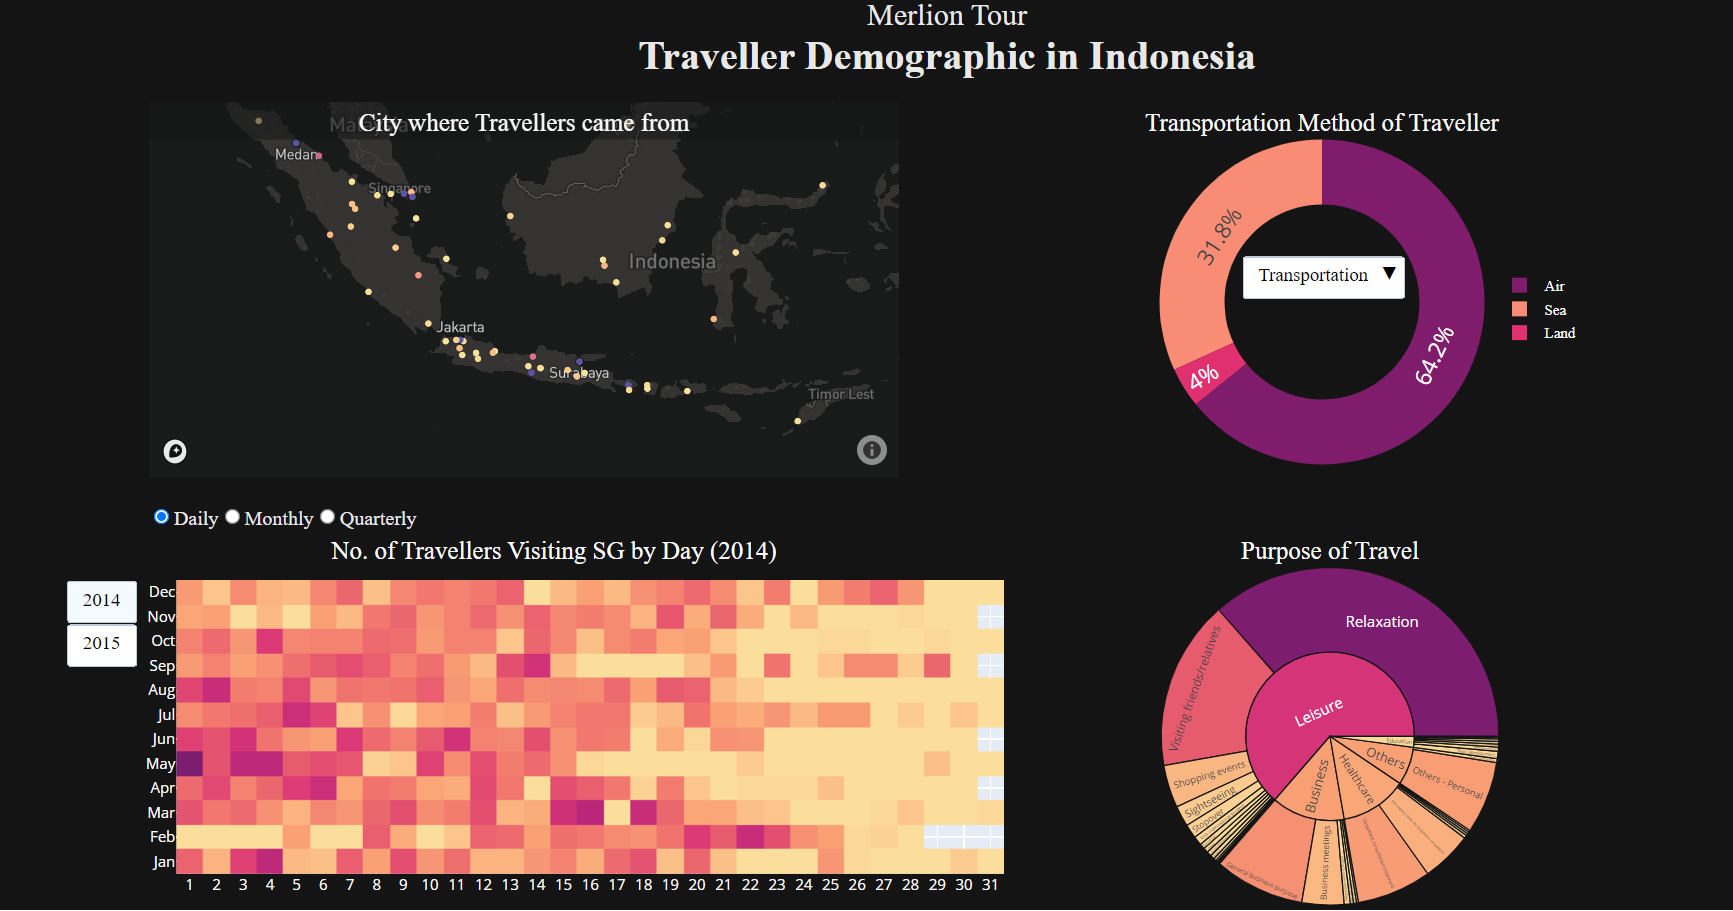

This dashboard here is used to display the traveller demographics. It will be used to understand our target audience better as this dashboard contains cross-filtering. When clicking on the bubbles in the map visual, it will update the donut chart beside it. This will allow to examine the data more in depth and more specifically and that will allow us to find new opportunities that can be used to improve Merlion Tours. For e.g. when I clicked on the city Aceh in the map visual, I discovered a lot. In Aceh, only 44% of the people speak English while 33% speak Malay, 11% speak Chinese and 11% speak Hybrid Indonesian. This finding shows that the language spoken by the travellers is also affected by the cities too. I will share more findings in the presentation later.

## 4.2 Dashboard 2 (Strategies to Improve Sales) <a id="part4.2"></a>

In [31]:
app = dash.Dash()

figures_leisure = [fig9_leisure,fig10_leisure]
figures_business = [fig9_business,fig10_business]

app.layout = html.Div([
    html.H4('Merlion Tour',style={'font-size': 'x-large','margin': 0, 'padding': 0,'font-weight': 'normal'}),
    html.H1('Strategies to Improve Sales',style={'font-size': 'xx-large','margin': 0, 'padding': 0,'font-weight': 'xx-large'}),
    html.Br(),
    html.Div([dcc.RadioItems(id='chart-selector', 
                             options=[{'label': 'Leisure', 'value': 'leisure'},
                                      {'label': 'Business', 'value': 'business'}], value='leisure',style={'text-align': 'center','font-size': 'large'})]),
    html.Br(),
    html.Div(id='charts-row-1',style={'display': 'inline-block'},children=[html.Div([dcc.RadioItems(id='figure-selection(leisure)',
                                                                   options=[{'label': 'Rating', 'value': 0},
                                                                            {'label': 'Hotel', 'value': 1}],value=0,style={'display': 'inline-block','margin-left': '-100%'}),
                                                    html.Br(),
                                                    dcc.Graph(id='selected-figure(leisure)',style={'display': 'inline-block', 'width':'45%','float': 'left','margin-left': '-55%'})]),
                                          html.Div(children=[dcc.Graph(id='chart-2',figure=fig7_leisure,style={'display': 'inline-block', 'width':'30%','float': 'right','margin-right': '10%'})])]),
    html.Br(),
    html.Div(id='charts-row-2',children=[html.Div(children=[dcc.Graph(id='chart-3', figure=fig11_leisure)],style={'display': 'inline-block'}),
                                         html.Div(children=[dcc.Graph(id='chart-4', figure=fig8_leisure)],style={'display': 'inline-block'}),],style={'display': 'flex', 'flex-direction': 'row'}),
    
    html.Div(id='charts-row-3',style={'display': 'inline-block'},children=[html.Div([dcc.RadioItems(id='figure-selection(business)',
                                                                   options=[{'label': 'Rating', 'value': 0},
                                                                            {'label': 'Hotel', 'value': 1}],value=0,style={'display': 'inline-block','margin-left': '-100%'}),
                                                    html.Br(),
                                                    dcc.Graph(id='selected-figure(business)',style={'display': 'inline-block', 'width':'45%','float': 'left','margin-left': '-55%'})]),
                                          html.Div(children=[dcc.Graph(id='chart-6',figure=fig7_business,style={'display': 'inline-block', 'width':'30%','float': 'right','margin-right': '10%'})])]),
    html.Br(),
    html.Div(id='charts-row-4',children=[html.Div(children=[dcc.Graph(id='chart-7', figure=fig11_business)],style={'display': 'inline-block'}),
                                         html.Div(children=[dcc.Graph(id='chart-8', figure=fig8_business)],style={'display': 'inline-block'}),],style={'display': 'flex', 'flex-direction': 'row'}),
    
],style={'textAlign': 'center',
          'backgroundColor':'#141414',
          'color':'#e8e8e8',
          'font-family': 'Roboto'})

@app.callback(
    dash.dependencies.Output('selected-figure(leisure)', 'figure'),
    [dash.dependencies.Input('figure-selection(leisure)', 'value')])
def update_figure(selected_index):
    return figures_leisure[selected_index]

@app.callback(
    dash.dependencies.Output('selected-figure(business)', 'figure'),
    [dash.dependencies.Input('figure-selection(business)', 'value')])
def update_figure(selected_index):
    return figures_business[selected_index]

@app.callback(
    [Output('charts-row-1', 'style'),
     Output('charts-row-2', 'style'),
     Output('charts-row-3', 'style'),
     Output('charts-row-4', 'style')],
    [Input('chart-selector', 'value')])

def update_charts(value):
    if value == 'leisure':
        return {'display': 'inline-block'}, {'display': 'inline-block'}, {'display': 'none'}, {'display': 'none'}
    elif value == 'business':
        return {'display': 'none'}, {'display': 'none'}, {'display': 'inline-block'}, {'display': 'inline-block'}

    
if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [01/Jan/2024 20:07:00] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Jan/2024 20:07:01] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [01/Jan/2024 20:07:01] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [01/Jan/2024 20:07:01] "GET /_favicon.ico?v=2.8.1 HTTP/1.1" 200 -
127.0.0.1 - - [01/Jan/2024 20:07:01] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Jan/2024 20:07:01] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Jan/2024 20:07:01] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [01/Jan/2024 20:07:01] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [01/Jan/2024 20:07:01] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [01/Jan/2024 20:07:04] "GET /_favicon.ico?v=2.8.1 HTTP/1.1" 200 -


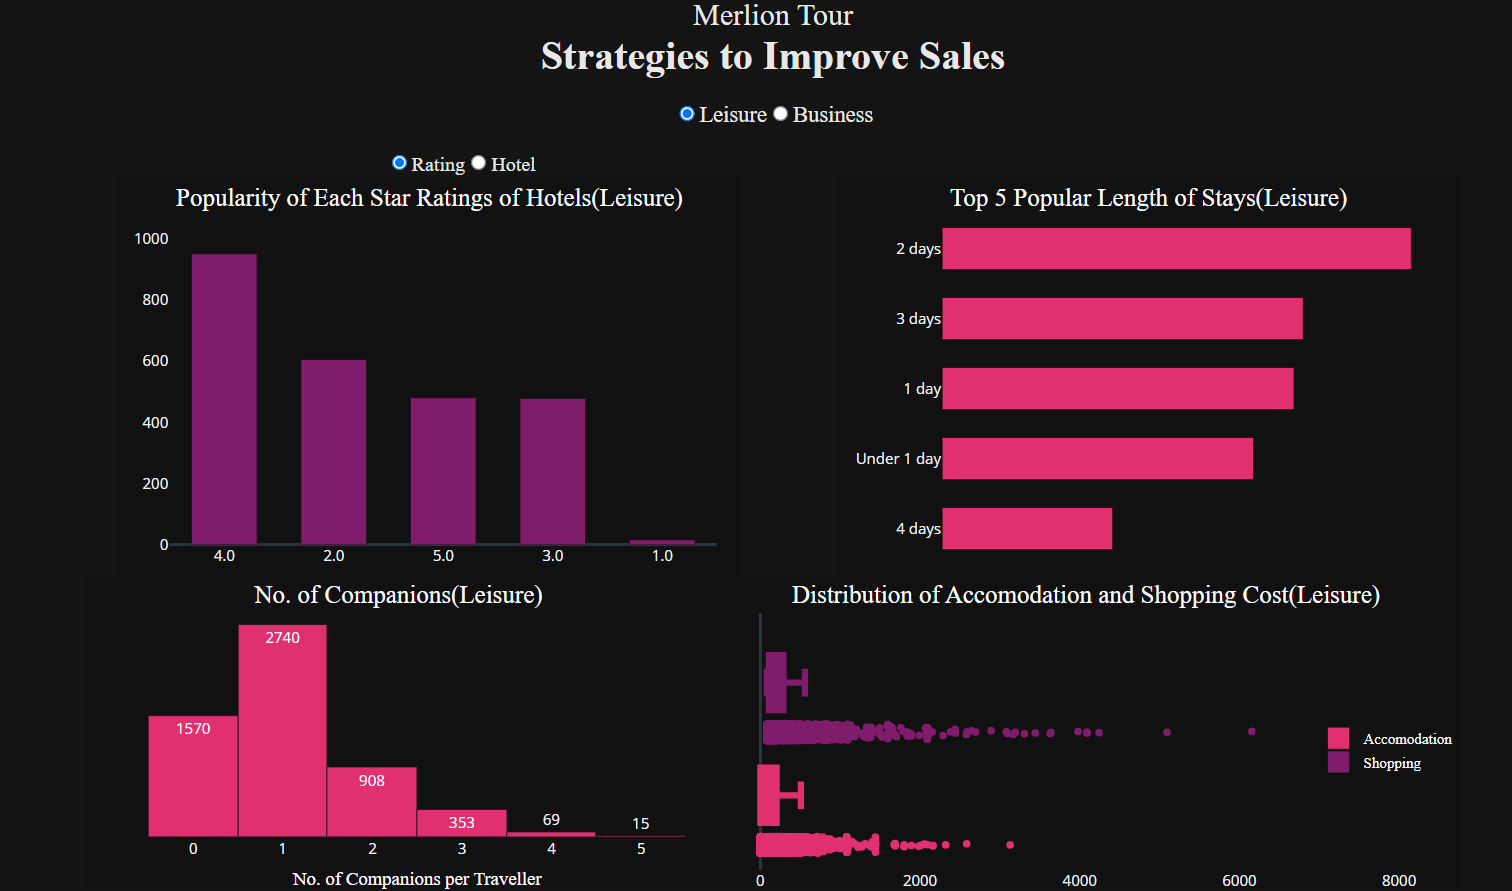

This dashboard is used to highlight the strategies that Merlion Tour could consider to improve the company's performance and attract more travellers. This dashboard is split into 2 parts using the buttons. One is for the leisure purpose group and the other one is for the business purpose group. I have decided to focus only on travellers who come to Singapore for leisure and business as these two groups are the most crucial target audiences as they are the ones who come to Singapore most commonly. By targeting these 2 groups, Merlion Tours will be able to tap on a huge group which can possibly improve the number of travellers using Merlion Tours packages. I will explain more strategies that I found using this dashboard in the presentation.